In [1]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.utils as vutils

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pathlib
from tqdm import tqdm
from PIL import Image

In [2]:
from utils.net_helper import *
from utils.trainer import train_loop
import network.networks as gans


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  
device

device(type='cuda', index=0)

### Process images and add to a dataloader

In [4]:
data = 'data/data_full/'
# data = 'data/data_small/'

In [5]:
image_size = 64
batch_size = 64

dataset_train = dset.ImageFolder(root=data,
                              transform=transforms.Compose([
                                  transforms.Resize(image_size),
                                  transforms.CenterCrop(image_size),
                                  transforms.ToTensor(),
                                  transforms.Normalize((.5,.5,.5), (.5,.5,.5))
                              ])
                            )

train_loader = torch.utils.data.DataLoader(dataset=dataset_train,
                                          batch_size=batch_size,
                                          shuffle=True)


### Setup networks

In [6]:
discriminator_lr = .0008
generator_lr = .0008

In [7]:
discriminator = gans.Gan_Discriminator([64,128,256,512], [3,3,3,3], [2,2,2,1]) #[64,64,128,128]
discriminator.to(device)
discr_opt = torch.optim.Adam(discriminator.parameters(), lr = discriminator_lr)

criterion = nn.BCELoss()

generator = gans.Gan_Generator((64,16,16), [2,2,1,1], [512,256,128,3], [3,3,3,3], [1,1,1,1]) #[128,64,64,3]
generator.to(device)
gen_opt = torch.optim.Adam(generator.parameters(), lr=generator_lr)

EPOCH:  1


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([39])) that is different to the input size (torch.Size([39, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.


DISCRIMINATOR Training loss:... 0.5876946161070159
GENERATOR Training loss:... 7.479065960363749

Best DLoss :  0.5876946161070159 ....OLD :  99999
Best GLoss :  7.479065960363749 ....OLD :  99999
show img


<Figure size 432x288 with 0 Axes>

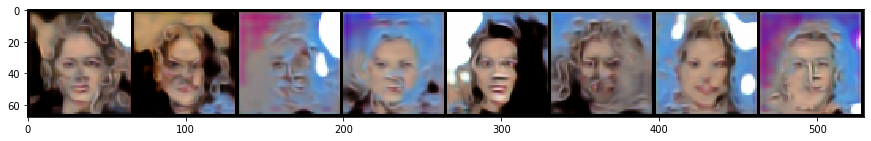


EPOCH:  2



DISCRIMINATOR Training loss:... 0.7957728648433534
GENERATOR Training loss:... 4.0688141429077875

Best GLoss :  4.0688141429077875 ....OLD :  7.479065960363749
show img


<Figure size 432x288 with 0 Axes>

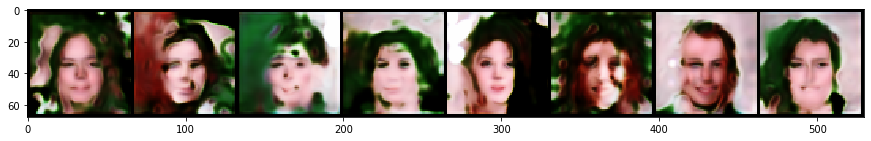


EPOCH:  3



DISCRIMINATOR Training loss:... 0.8441793943254662
GENERATOR Training loss:... 3.1238305750935424

Best GLoss :  3.1238305750935424 ....OLD :  4.0688141429077875
show img


<Figure size 432x288 with 0 Axes>

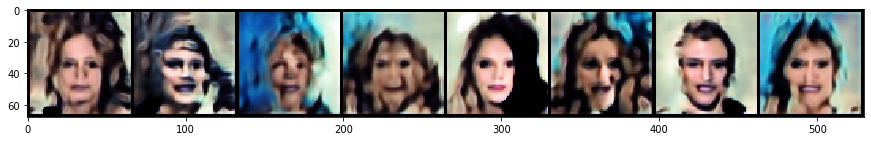


EPOCH:  4



DISCRIMINATOR Training loss:... 0.8044001370790783
GENERATOR Training loss:... 2.9068719878067943

Best GLoss :  2.9068719878067943 ....OLD :  3.1238305750935424
show img


<Figure size 432x288 with 0 Axes>

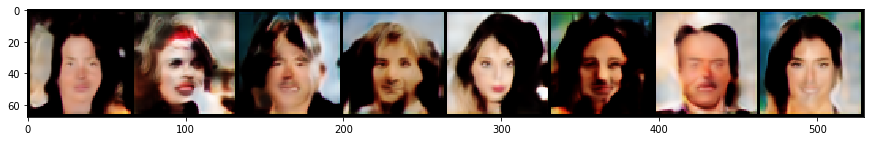


EPOCH:  5



DISCRIMINATOR Training loss:... 0.773810529574253
GENERATOR Training loss:... 2.765589659312294

Best GLoss :  2.765589659312294 ....OLD :  2.9068719878067943
show img


<Figure size 432x288 with 0 Axes>

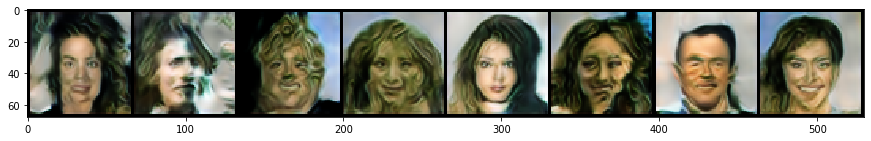


EPOCH:  6



DISCRIMINATOR Training loss:... 0.795659585745884
GENERATOR Training loss:... 2.5766611492434257

Best GLoss :  2.5766611492434257 ....OLD :  2.765589659312294
show img


<Figure size 432x288 with 0 Axes>

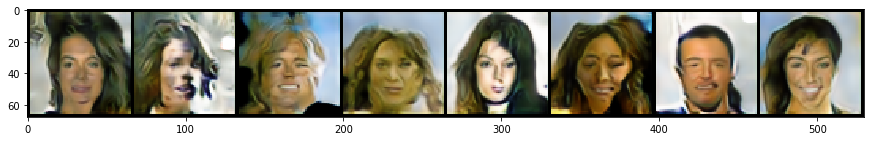


EPOCH:  7



DISCRIMINATOR Training loss:... 0.7310106600420014
GENERATOR Training loss:... 2.7220906271391554

show img


<Figure size 432x288 with 0 Axes>

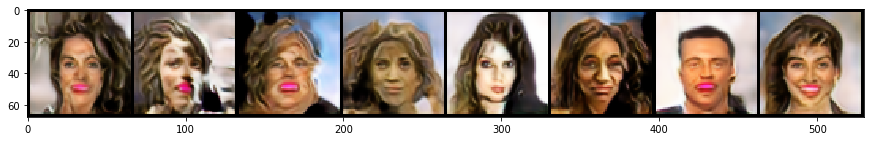


EPOCH:  8



DISCRIMINATOR Training loss:... 0.6563639729951501
GENERATOR Training loss:... 2.9523888422542184

show img


<Figure size 432x288 with 0 Axes>

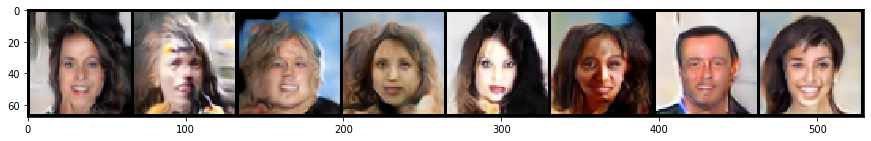


EPOCH:  9



DISCRIMINATOR Training loss:... 0.6134598103686649
GENERATOR Training loss:... 3.1289435627806133

show img


<Figure size 432x288 with 0 Axes>

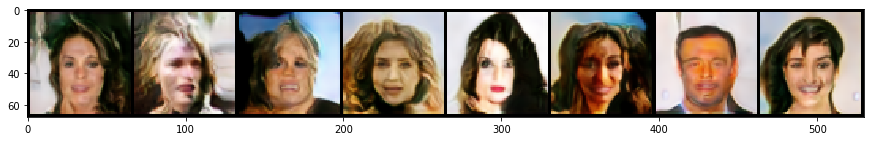


EPOCH:  10



DISCRIMINATOR Training loss:... 0.5588457100881724
GENERATOR Training loss:... 3.3727906003208457

Best DLoss :  0.5588457100881724 ....OLD :  0.5876946161070159
show img


<Figure size 432x288 with 0 Axes>

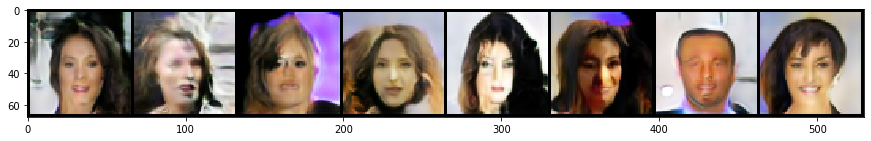

In [8]:
epochs = 10
save_path = 'exp/exp2/'
save_last = True
hist = train_loop(
                train_loader, 
                epochs,
                discriminator, 
                generator,
                discr_opt,
                gen_opt,
                criterion,
                save_path,
                save_last,
                show_img=True
                )    

<Figure size 432x288 with 0 Axes>

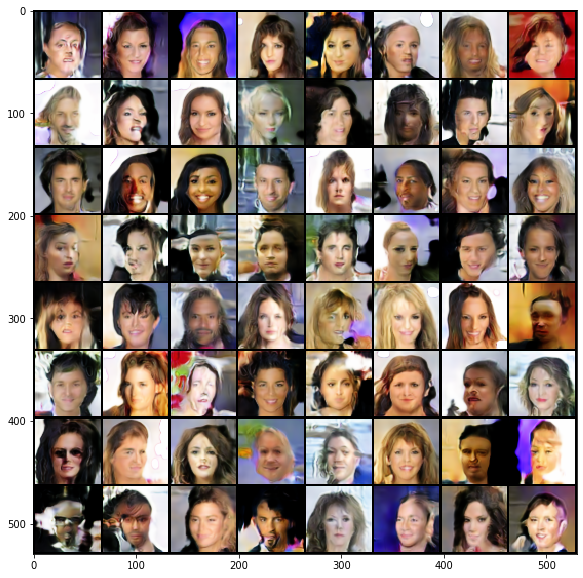

In [11]:
gen_fake_images(generator,
                device, 
                amount=64, 
                z_size=100, 
                display_size=10)